In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime

In [3]:
from sklearn.neighbors import LocalOutlierFactor

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.dtypes

Trader             object
Asset Name         object
Status             object
Trade Type         object
Payout            float64
Investment          int64
Trader Profit     float64
Trading Strike    float64
Close Strike      float64
Trading Time       object
Close Time         object
dtype: object

In [6]:
df['Trader'].replace(['trader A', 'trader B', 'trader C', 'trader E'], [0, 1, 2, 3], inplace=True)
df['Status'].replace(['Closed', 'Sold'], [0,1], inplace=True)
df['Trade Type'].replace(['Call', 'Put'], [0,1], inplace=True)

In [7]:
df = df.drop(['Asset Name'], axis=1)

In [8]:
df['Trading Time'] = pd.to_datetime(df['Trading Time'])
df['Close Time'] = pd.to_datetime(df['Close Time'])

In [9]:
df = df.drop(['Trading Time', 'Close Time'], axis=1)

In [10]:
df.dtypes

Trader              int64
Status              int64
Trade Type          int64
Payout            float64
Investment          int64
Trader Profit     float64
Trading Strike    float64
Close Strike      float64
dtype: object

In [11]:
clf_lof = LocalOutlierFactor(n_neighbors=30, algorithm='auto', contamination=.1)
y_pred = clf_lof.fit_predict(df)

LOF_Scores = clf_lof.negative_outlier_factor_
LOF_pred = pd.Series(y_pred).replace([-1, 1], [1, 0])
LOF_anomalies = df[LOF_pred==1]

In [12]:
# Check if all scores are negative
LOF_Scores

array([-0.95616915, -0.99825766, -1.00983241, ..., -1.39696825,
       -1.1169183 , -1.80194024])

In [13]:
cmap = np.array(["skyblue", "red"])

In [20]:
def plot_lof(i):
    plt.scatter(df.iloc[:, i], df.iloc[:,i+1], c="skyblue", s=40, edgecolor="k")
    plt.scatter(LOF_anomalies.iloc[:, i], LOF_anomalies.iloc[:, i+1], c="red", s=40, edgecolor="k")
    plt.title("Visualize Local Outlier Factors between Feature Pair: V{} and V{}".format(i, i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

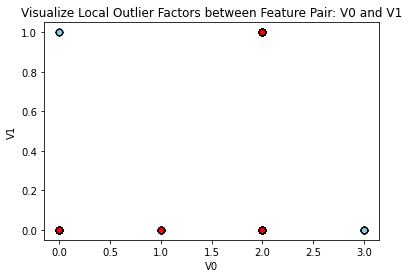

In [28]:
plot_lof(0)

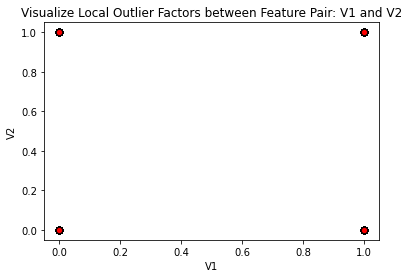

In [21]:
plot_lof(1)

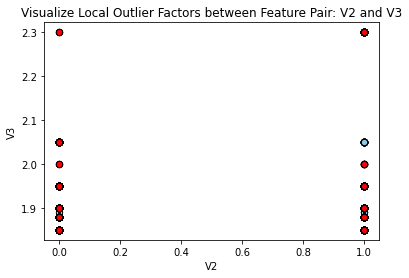

In [22]:
plot_lof(2)

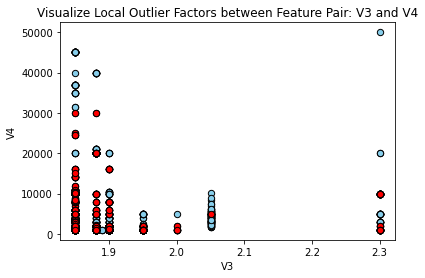

In [23]:
plot_lof(3)

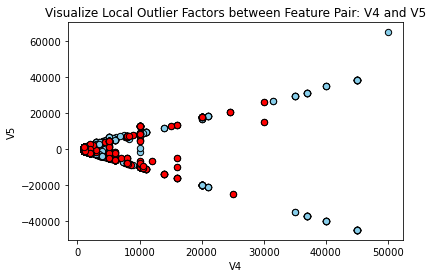

In [24]:
plot_lof(4)

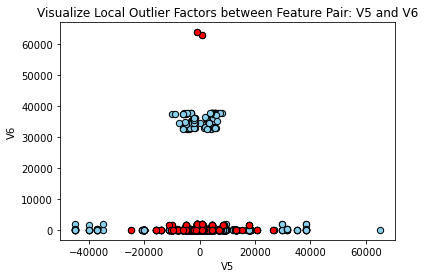

In [25]:
plot_lof(5)

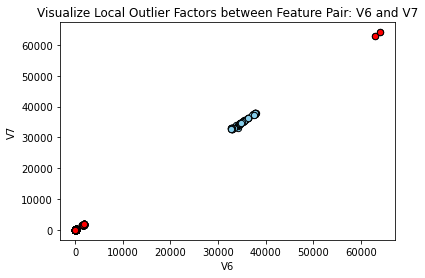

In [26]:
plot_lof(6)